In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
x = np.arange(0.01, 1, 0.01)
y = -np.log(x)

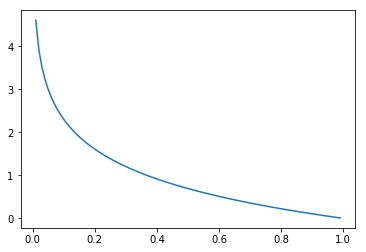

In [19]:
plt.plot(x, y)
plt.show()

In [6]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

最小自乗
$$ E=\frac{1}{2} \sum_{k} (y_k −t_k)^2  $$
クロスエントロピー関数
$$ E= - \sum_k t_k \log y_k $$

In [52]:
def mean_squared_error(y, t):
         return 0.5 * np.sum((y-t)**2)
def cross_entropy_error(y, t):
    delta = 1e-7
    return -1 * np.sum(t * np.log(y + delta))

In [15]:
mean_squared_error(y, t)

0.097500000000000031

In [16]:
cross_entropy_error(y, t)

0.51082545709933802

$$ E = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log y_{nk} $$

In [18]:
import sys
sys.path.append('../deep-learning-from-scratch/')
from dataset.mnist import load_mnist

In [19]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [10]:
import pickle
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, one_hot_label=True)
    return x_train, t_train
def init_network():
    with open("../deep-learning-from-scratch/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [44]:
x, t = get_data()
y = predict(init_network(), x)

In [54]:
cross_entropy_error(y, t) / len(y)

12.093386222012837

In [48]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [49]:
np.random.choice(60000, 10)

array([16995, 18032,  8793, 16216, 56657, 46323, 45998, 13046, 18207, 17282])

In [11]:
def cross_entropy_error2(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [53]:
cross_entropy_error2(y, t)

12.199955128161113

# 4.3

In [2]:
def numerical_diff_wrong(f, x):
        h = 10e-50
        return (f(x+h) - f(x)) / h

def numerical_diff(f, x):
        h = 1e-4 # 0.0001
        return (f(x+h) - f(x-h)) / (2*h)

$ y = 0.01x^2 + 0.1x $

In [3]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

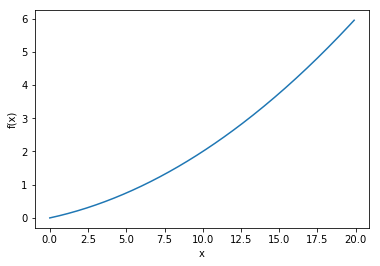

In [4]:
x = np.arange(0.0, 20.0, 0.1) # 0 から 20 まで、0.1 刻みの x 配列
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [8]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


$ f(x_0, x_1)=x^2_0 +x^2_1 $ 

In [3]:
def function_2(x):
    return x[0]**2 + x[1]**2
# または return np.sum(x**2)

In [11]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [12]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 4.4

In [4]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x と同じ形状の配列を生成
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h) の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
    return grad

In [5]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[ 6.  8.]
[ 0.  4.]
[ 6.  0.]


In [1]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x  = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [8]:
print(gradient_descent(function_2, init_x=np.array([3.0, 4.0]), lr=0.1, step_num=100))
print(gradient_descent(function_2, init_x=np.array([0.0, 2.0]), lr=0.1, step_num=100))
print(gradient_descent(function_2, init_x=np.array([3.0, 0.0]), lr=0.1, step_num=100))

print(gradient_descent(function_2, init_x=np.array([3.0, 4.0]), lr=10, step_num=100))
print(gradient_descent(function_2, init_x=np.array([0.0, 2.0]), lr=10, step_num=100))
print(gradient_descent(function_2, init_x=np.array([3.0, 0.0]), lr=10, step_num=100))

print(gradient_descent(function_2, init_x=np.array([3.0, 4.0]), lr=0.001, step_num=100))
print(gradient_descent(function_2, init_x=np.array([0.0, 2.0]), lr=0.001, step_num=100))
print(gradient_descent(function_2, init_x=np.array([3.0, 0.0]), lr=0.001, step_num=100))

[  6.11110793e-10   8.14814391e-10]
[  0.00000000e+00   4.07407195e-10]
[  6.11110793e-10   0.00000000e+00]
[  2.58983747e+13  -1.29524862e+12]
[  0.00000000e+00   1.27872298e+13]
[  1.91613251e+13   0.00000000e+00]
[ 2.45570041  3.27426722]
[ 0.          1.63713361]
[ 2.45570041  0.        ]


In [23]:
import sys, os
sys.path.append('../deep-learning-from-scratch/')
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [24]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # ガウス分布で初期化
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error2(y, t)
        return loss

In [25]:
net = simpleNet()

In [26]:
net.W

array([[ 0.16612528,  0.8096545 , -0.49369872],
       [-0.73694753, -0.36203364,  0.6568168 ]])

In [27]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.56357761  0.15996243  0.29491589]


In [28]:
np.argmax(p)

2

In [29]:
t = np.array([0,0,1])
net.loss(x,t )

0.83184622164929523

In [33]:
def f(W):
    return net.loss(x, t)

In [30]:
f = lambda W: net.loss(x, t)

In [34]:
numerical_gradient(f, net.W)

array([[ 0.11067411,  0.2281789 , -0.33885301],
       [ 0.16601116,  0.34226835, -0.50827951]])

# 4.5

In [36]:
import sys, os
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                                    np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [49]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(
    net.params['W1'].shape, # (784, 100)
    net.params['b1'].shape, # (100,)
    net.params['W2'].shape, # (100, 10)
    net.params['b2'].shape, # (10,)
)

(784, 100) (100,) (100, 10) (10,)


In [45]:
x = np.random.rand(100, 784) # ダミーの入力データ(100 枚分) 
y = net.predict(x)
x.shape, y.shape

((100, 784), (100, 10))

In [47]:
x = np.random.rand(100, 784) # ダミーの入力データ(100 枚分) 
t = np.random.rand(100, 10) # ダミーの正解ラベル(100 枚分)
grads = net.numerical_gradient(x, t) # 勾配を計算
print(
    grads['W1'].shape,  # (784, 100)
grads['b1'].shape,  # (100,)
grads['W2'].shape,  # (100, 10)
grads['b2'].shape,  # (10,)
)

(784, 100) (100,) (100, 10) (10,)


In [54]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
     load_mnist(normalize=True, one_hot_label=True)

In [56]:
sys.path.append('../deep-learning-from-scratch/ch04/')
from two_layer_net import TwoLayerNet

In [57]:
train_loss_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 勾配の計算
#     grad = network.numerical_gradient(x_batch, t_batch) 
    grad = network.gradient(x_batch, t_batch) # 高速版!
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    # 学習経過の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

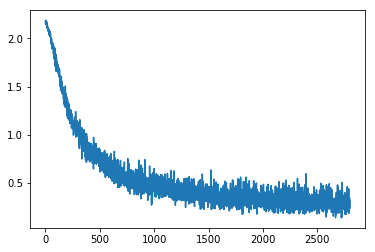

In [62]:
plt.plot(train_loss_list[200:3000])
plt.show()

In [63]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# 1 エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 勾配の計算
#     grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 高速版!
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1 エポックごとに認識精度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.78515, 0.7919
train acc, test acc | 0.879016666667, 0.882
train acc, test acc | 0.8984, 0.901
train acc, test acc | 0.907866666667, 0.9103
train acc, test acc | 0.914016666667, 0.9191
train acc, test acc | 0.919283333333, 0.921
train acc, test acc | 0.9226, 0.9241
train acc, test acc | 0.92655, 0.9292
train acc, test acc | 0.9301, 0.9307
train acc, test acc | 0.933, 0.9335
train acc, test acc | 0.935933333333, 0.9367
train acc, test acc | 0.9384, 0.9382
train acc, test acc | 0.9402, 0.9411
train acc, test acc | 0.942866666667, 0.9422
train acc, test acc | 0.94475, 0.9439
train acc, test acc | 0.946283333333, 0.9446


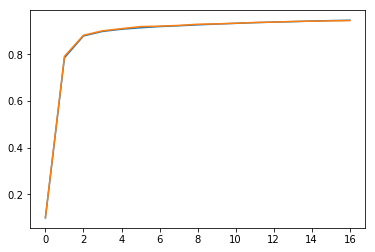

In [64]:
plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.show()